In [2]:
# Data Tools
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import sem

# Visualization Tools
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Test/Train Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

# Helpful Functions
# Reference: https://people.duke.edu/~rnau/mathreg.htm
def standard_error(x_test, y_test, y_pred, p=1):
    n = len(x_test)
    e = y_test - y_pred
    RSS = (e**2).sum()
    sigma = math.sqrt(RSS / (n - (p + 1))) # estimation of standard deviation (aka residual standard error)
    SE = sigma**2 / np.sum((x_test - x_test.mean())**2)
    return math.sqrt(SE)

def residual_standard_error(y_test, y_pred):
    e = y_test - y_pred
    RSS = (e**2).sum()
    RSE = math.sqrt(RSS / (len(y_test) - 2))
    return RSE

def f_statistic(y_test, y_pred, p):
    n = len(y_test)
    e = y_test - y_pred
    RSS = (e**2).sum()
    TSS = ((y_test - y_test.mean())**2).sum()
    F = ((TSS - RSS)/p) / RSS * (n - p - 1)
    return F

def print_coefficient_stats(x_test, y_test, y_pred, lr):
    print('\n=== Coefficient Summary ===')

    for i in range(len(x_test.columns)):
        print('\n' + str(x_test.columns[i]).center(len(x_test.columns[i]) + 2, ' ').center(30, '-'))
        # Coefficient
        print('Coefficient: {:0.4f}'.format(lr.coef_[i]))

        # Standard Error
        print('Standard Error: {:0.4f}'.format(standard_error(x_test[x_test.columns[i]], y_test, y_pred, p=len(lr.coef_))))
        
        # t-statistic
        t_stat = (lr.coef_[i] / standard_error(x_test[x_test.columns[i]], y_test, y_pred, p=len(lr.coef_)))
        print('T-Statistic: {:0.4f}'.format(t_stat))

        # p Value
        p_val = stats.t.sf(np.abs(t_stat), len(x_test[x_test.columns[i]]) - 1) * 2
        print('P Value: {:0.4f}'.format(p_val))

    # Intercept
    print('\n' + str('Intercept').center(len('Intercept') + 2, ' ').center(30, '-'))
    print('Coefficient: {:0.4f}'.format(lr.intercept_))

    
# TODO: Need to fix coefficient stats for multiple linear regression (the problem occurs at the Standard Error)
# TODO: Need to include intercept in the calculations
def coefficient_stats(x_test, y_test, y_pred, lr):
    df_array = []
    headings = ['Feature', 'Coefficient', 'Standard Error', 'T_Statistic', 'p Value']
    for i in range(len(x_test.columns)):
        feature = x_test.columns[i]
        SE = standard_error(x_test[feature], y_test, y_pred, p=len(lr.coef_))
        t_stat = (lr.coef_[i] / standard_error(x_test[feature], y_test, y_pred, p=len(lr.coef_)))
        p_val = stats.t.sf(np.abs(t_stat), len(x_test[feature]) - 1) * 2
        df_array.append([
            feature,
            lr.coef_[i],
            SE,
            t_stat,
            p_val
        ])
    return pd.DataFrame(df_array, columns=headings)

metric_funcs = [explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, residual_standard_error, r2_score]

def print_regression_metrics(y_test, y_pred, metric_funcs):
    print('=== Statistics Summary ===')

    for func in metric_funcs:
        print(func.__name__ + ': {:0.4f}'.format(func(y_test, y_pred)))

def regression_metrics(y_test, y_pred, metric_funcs, p=1):
    df_array = []
    headings = ['Metric', 'Value']

    for func in metric_funcs:
        df_array.append([
            ' '.join([x.capitalize() for x in func.__name__.split('_')]),
            func(y_test, y_pred)
        ])

    # F-Statistic
    if p:
        df_array.append([
            'F-Statistic',
            f_statistic(y_test, y_pred, p)
        ])

    return pd.DataFrame(df_array, columns=headings)

In [7]:
df = pd.read_csv('data/laptop_battery_trainingdata.csv')

In [8]:
df

,charged,lasted
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80
...,...,...
95,4.38,8.00
96,8.06,8.00
97,8.05,8.00
98,1.10,2.20


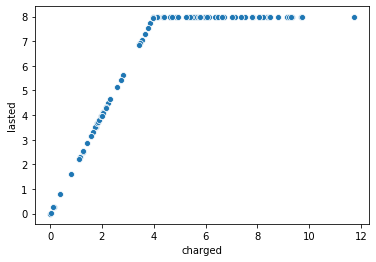

In [9]:
sns.scatterplot(
    x='charged',
    y='lasted',
    data=df
)

In [36]:
df['charged^2'] = df.charged**2
df['charged^3'] = df.charged**3
df['charged^4'] = df.charged**4
df['charged^5'] = df.charged**5
df['charged^6'] = df.charged**6
df['charged^7'] = df.charged**7
df['charged^8'] = df.charged**8
df['charged^9'] = df.charged**9

lr = LinearRegression()
lr.fit(df.drop('lasted', axis=1), df.lasted)
y_pred = lr.predict(df.drop('lasted', axis=1))

RMSE = np.sqrt(((y_pred - df.lasted)**2).sum())

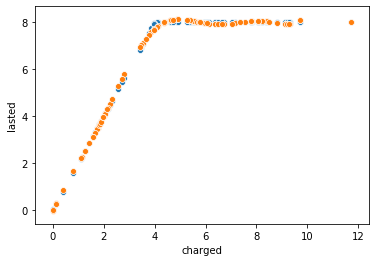

In [37]:
sns.scatterplot(
    x='charged',
    y='lasted',
    data=df
)

sns.scatterplot(
    x=df.charged,
    y=y_pred
)

In [41]:
for i in range(len(lr.coef_)):
    print('b{} = {:0.8f}'.format(i, lr.coef_[i]))
display(lr.intercept_)

b0 = 2.37235339
b1 = -0.21559558
b2 = -0.43781058
b3 = 0.50641955
b4 = -0.20532654
b5 = 0.04076276
b6 = -0.00430680
b7 = 0.00023307
b8 = -0.00000509


-0.03225701825788185

In [40]:
test = 0.09
test_df = pd.DataFrame([test, test**2, test**3, test**4, test**5, test**6, test**7, test**8, test**9]).T
lr.predict(test_df)

array([0.17922133])

In [43]:
df2 = pd.read_csv('data/laptop_battery_trainingdata.csv')

In [44]:
# Final submission

#!/bin/python3

import math
import os
import random
import re
import sys

if __name__ == '__main__':
    timeCharged = float(input())
    print('{:0.2f}'.format(timeCharged * 2 if timeCharged * 2 <= 8 else 8))

Index(['charged', 'lasted'], dtype='object')